# Pytorch basics

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Basic autograd example 1

In [4]:
# Create tensors.
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

In [5]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



# Basic autograd example 2

In [6]:
# Create tensors.
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
 0.0617 -0.4733  0.3023
-0.4100  0.0271 -0.2699
[torch.FloatTensor of size 2x3]

b:  Parameter containing:
-0.5201
-0.0465
[torch.FloatTensor of size 2]



In [7]:
# Forward propagation.
pred = linear(x)
print(pred)

Variable containing:
-0.4236 -0.0147
-1.2864  0.3496
-0.1673 -0.0767
-0.1987 -0.1804
-0.5573  0.8858
[torch.FloatTensor of size 5x2]



In [8]:
# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.data[0])

loss:  1.92258620262146


In [9]:
# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  Variable containing:
 1.0218 -0.6281 -0.0250
-0.5562 -0.0586 -0.5835
[torch.FloatTensor of size 2x3]

dL/db:  Variable containing:
-1.3196
 0.3208
[torch.FloatTensor of size 2]



In [10]:
# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])

loss after 1 step optimization:  1.8834739923477173


# Load data from numpy

In [11]:
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array

# Implementing the input pipeline

In [12]:
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='./data/',
                              train=True, 
                              transform=transforms.ToTensor(),
                              download=True)

Files already downloaded and verified


In [13]:
# Select one data pair (read data from disk).
image, label = train_dataset[7]
print(image.size())
print(label)

torch.Size([3, 32, 32])
7


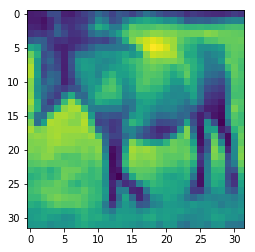

In [14]:
plt.imshow(image.numpy()[0])

In [15]:
# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass

# Input pipeline for custom dataset

In [ ]:
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# Using pretrained model

In [19]:
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = True
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

In [20]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(resnet))

11227812


In [23]:
# For test.
images = Variable(torch.randn(10, 3, 224, 224))
outputs = resnet(images)
print(outputs)  

Variable containing:
-0.4477  0.1277  0.4070  ...  -0.9360  0.6794  0.1676
 0.0243  0.1258  0.3957  ...  -0.2681  0.3237 -0.0667
-0.1448  0.7133  0.4125  ...  -0.9420  0.0956 -0.1264
          ...             ⋱             ...          
-0.0484  0.3275 -0.1714  ...  -0.5008  0.7650  0.1089
-0.1188  0.4415  0.8941  ...  -0.4662  0.8276  0.2353
-0.7835  0.4349  0.3300  ...  -0.8063  1.2214  0.2567
[torch.FloatTensor of size 10x100]



# Save and load model

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))